<a href="https://colab.research.google.com/github/sejin-sim/Data_Mining/blob/main/6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised learning(지도 학습)
> * Classification : KNN, Decision tree, **SVM** + 딥러닝시 DNN, CNN   
> * Regression : linear regression,

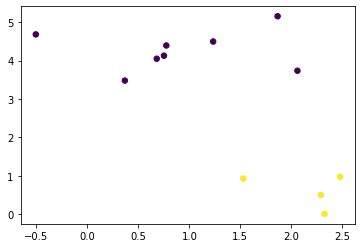

In [37]:
# Linearly separable(분해가능공간) data with no noise

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
# make_blobs : 클러스링 용 가상데이터를 생성하는데 사용
# 반환 X : [n_samples, n_features] 크기의 배열 - 독립 변수
#      y : [n_samples] 크기의 배열             - 종속 변수

X, y = make_blobs(n_samples=60, centers=2, random_state=0,                   
                cluster_std=0.580)
# n_samples : 표본 데이터의 수, 디폴트 100
# centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
# cluster_std: 클러스터의 표준 편차, 디폴트 1.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap='viridis');
# 산포 그래프 - X축: X_test[:, 0], y축: X_test[:, 1], c: y_test의 class에 따라 색 구분, s: 점의 크기, cmap(colour map) 



![colormap](https://codetorial.net/matplotlib/_images/set_colormap_00.png)

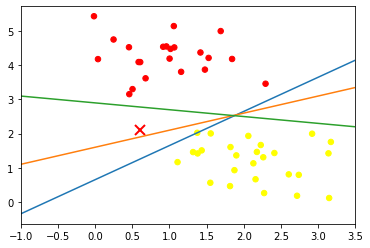

In [31]:
xfit = np.linspace(-1, 3.5)
# (s, end, point-no) 시작점과 끝점을 균일 간격으로 나눈 점들을 생성해주는 linspace()함수. 등차수열을 생성

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='autumn')

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
# x 표시의 위치,색상, 폰트의 폭, 사이즈

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
 plt.plot(xfit, m * xfit + b, '-')
# m=1, b=0.65 인 경우, m=0.5,b=1.6 등 총 3개의 라인 그리기
# 각자 다른 색은 '-'

plt.xlim(-1, 3.5);
# x축 제한을 설정. 그래프 상에서 경계값이 -1.0에서 3.5까지

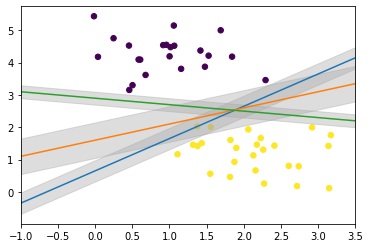

In [18]:
# Support Vector Machines: Maximizing the Margin

xfit = np.linspace(-1, 3.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='viridis')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
# x축의 xfit범위에서 y축의 yfit+d와 yfit-d사이를 채움, alpha->채운 색의 진한 정도 
plt.xlim(-1, 3.5);

In [19]:
# SVM margin line 그리기 기초

y = np.array([[0.21, 0.73, 0.69 ],  [0.35, 0.24, 0.53],  [0.01, 0.42, 0.50]])
x = np.array([[0.34, 0.26, 0.76 ],  [0.79, 0.82, 0.37 ],  [0.93, 0.87, 0.94]])

x.ravel() # 1차원으로 변형

array([0.34, 0.26, 0.76, 0.79, 0.82, 0.37, 0.93, 0.87, 0.94])

In [20]:
np.vstack([x.ravel(), y.ravel()])

# vstack : 행 추가
# hstack : 열 추가

array([[0.34, 0.26, 0.76, 0.79, 0.82, 0.37, 0.93, 0.87, 0.94],
       [0.21, 0.73, 0.69, 0.35, 0.24, 0.53, 0.01, 0.42, 0.5 ]])

In [21]:
np.vstack([x.ravel(), y.ravel()]).T # T = 전치 행렬

array([[0.34, 0.21],
       [0.26, 0.73],
       [0.76, 0.69],
       [0.79, 0.35],
       [0.82, 0.24],
       [0.37, 0.53],
       [0.93, 0.01],
       [0.87, 0.42],
       [0.94, 0.5 ]])

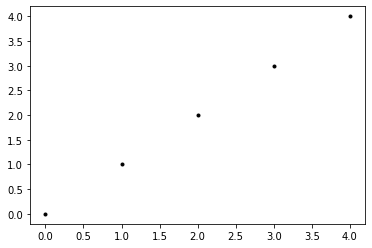

In [22]:
# 목적: x 값의 배열과 y 값의 배열로 직사각형 격자를 만드는 것

# Example) 
# x와 y 방향에서 0과 4 사이의 각 정수 값에 점이 있는 그리드를 만들려면 사각형 격자를 만든다.
# 사각형 격자를 만들려면, 우리는 모든 조합이 필요 
# x, y포인트를 조합하면 25 점이다.

x = np.array([0, 1, 2, 3, 4]);
y = np.array([0, 1, 2, 3, 4])

xx, yy = np.meshgrid(x, y, sparse=True) # meshgrid : 2차원 그리드 좌표를 반환
plt.plot(x,y, marker='.', color='k', linestyle='none')

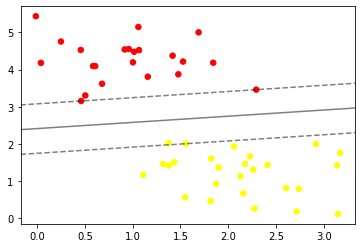

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs

def plot_svc_decision_function (model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()   # 현재 축 얻기
    xlim = ax.get_xlim() # 현재 설정된 x축 눈금 알아내기
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)  #  시작점 xlim[0] 과 끝점 xlim[1], 사이에 균등하게 30개로 나눈 sample들을 반환
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # x, y축의  Value값을 받아서 좌표행렬을 반환한 값으로 출력하는 np함수이다.
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) #Calculate the function distance from  the sample point to the segmented hyperplane
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

X, label = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.580)                  
                
# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size = 0.2, random_state=0)

# Create a linear SVM classifier 
clf = svm.SVC(kernel='linear')

# Train classifier 
clf.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='autumn')
# Plot decision function on training and test data
plot_svc_decision_function(clf)

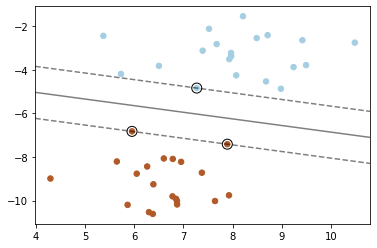

학습 데이터에 대한 에로 메트릭스: [[22  0]
 [26  0]]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=6)  # we create 40 separable points

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000) # C값이 클수록 hard margin, 작을 수록 soft margin
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()                    # plot the decision function   # 주어진 축에 대한 정보를 얻는다. you can use plt. Gca() to get a reference to the current axes
xlim = ax.get_xlim()          # 현재 설정된 x축 눈금 알아내기
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)  # create grid to evaluate model, 시작점 xlim[0] 과 끝점 xlim[1], 사이에 균등하게 30개로 나눈 sample들을 반환
yy = np.linspace(ylim[0], ylim[1], 30) 
YY, XX = np.meshgrid(yy, xx)               # x, y축의  Value값을 받아서 좌표행렬을 반환한 값으로 출력하는 np함수이다.
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)  # segmented hyperplane 에서 sample데이터까지 거리 계산함수값을 계산하여 XX.shape 인 (30,30)에 reshape

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']) # plot decision boundary and margins
# 알파값이 클수록 선이 굵다. Color =‘k’ 검은선으로 나타냄
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

from sklearn.metrics import confusion_matrix
pred_train = clf.predict(X_train)
confusion_train = confusion_matrix(y_train, pred_train)

print("학습 데이터에 대한 에로 메트릭스:", confusion_train)


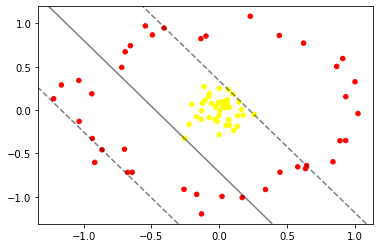

In [25]:

from sklearn.datasets.samples_generator import make_circles
from sklearn import svm
X, y = make_circles(100, factor=.1, noise=.1) 
# factor inner circle과 outer circle의 비율, 비율이 작을 수록  구분이 잘 됨, 비율이 크면 혼재하게 됨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Create a linear SVM classifier 
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


In [26]:
!pip install mglearn

     |████████████████████████████████| 542kB 6.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=7c66e6c2df9b50db8b11b32e7f7f517fb6004dadbc6dd5fd755e1851c9c210a7
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


Text(0, 0.5, 'Feature 1')

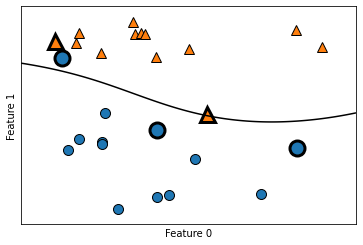

In [27]:
import sklearn
import mglearn
from six import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from six import StringIO

x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x,y) 
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. 하나의 학습 샘플이 미치는 영향의 범위# 를 결정한다. 작은 값은 넓은 영역을 뜻한다.
mglearn.plots.plot_2d_separator(svm, x, eps=.5) 
# 2차원 평면을 나누기 위해 , eps: 전체 그래프의 범위의 비율
mglearn.discrete_scatter(x[:,0], x[:,1],y)

sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


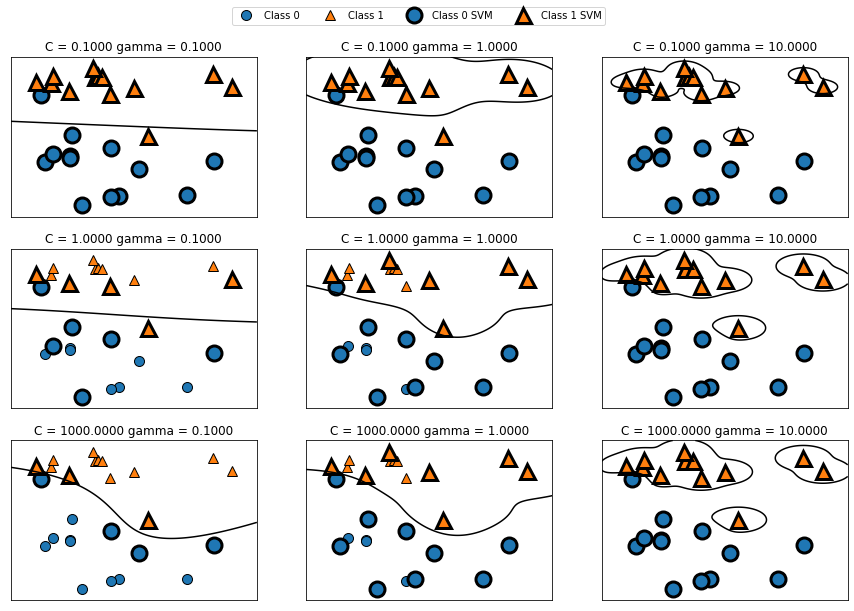

In [28]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 SVM", "Class 1 SVM"], ncol=4, loc=(.9, 1.2))


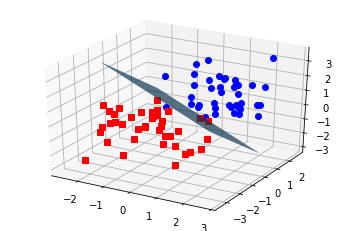

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

rs = np.random.RandomState(1)
# Generate some fake data.
n_samples = 80
X = np.zeros((80,3)) # X is the input features by row.
X[:n_samples//2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples//2)
X[n_samples//2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples//2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[n_samples//2:] = 1

svc = SVC(kernel='linear') # Fit the data with an svm
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]
tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()
